# Data Analysis for OH<sup>-</sup>(H<sub>2</sub>O)<sub>5</sub> DMC Data

### Install necessary libraries and define constants

In [2]:
import numpy as np
import pyvibdmc as pv
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib
import pandas as pd
from nn_dmc import *

import h5py

au_to_cm = 219474.63136320

au_to_ang = 0.529177249

h11o6_atoms = np.array([8,1,1,8,1,1,8,1,1,8,1,1,8,1,1,8,1])
h11o6_groups = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16]]

h11o6_atom_names = ['O','H','H','O','H','H','O','H','H','O','H','H','O','H','H','O','H']

ml_path = 'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/Machine Learning'
data_path = 'C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data'

In [84]:
read_xyz_file(f'{ml_path}/h11o6/geometries/h11o6_3_2_prism_mobml_opt_new.xyz')

array([[ 2.12675791,  3.55887668, -0.52925931],
       [ 2.23045604,  2.34395855,  0.86313594],
       [ 0.34881038,  3.54872431, -0.95268684],
       [-2.53335434, -0.8748623 ,  2.75303177],
       [-0.53952694, -0.70448946,  2.94340334],
       [-3.13060447, -1.69668362,  4.24206655],
       [-3.34520825,  2.42040932, -1.38441096],
       [-2.95022126,  0.89826667, -2.31036699],
       [-3.41477498,  1.76689417,  0.32171425],
       [ 3.45055238, -1.79623473, -1.83210878],
       [ 3.42159931, -0.04472732, -2.33424265],
       [ 3.21322688, -1.60927203,  0.01626835],
       [-1.80413472, -2.75432059, -2.29047545],
       [ 0.03247332, -2.6201657 , -2.34088022],
       [-2.18511324, -2.56087384, -0.51097406],
       [ 2.12537326, -0.43046498,  2.77646982],
       [ 3.0029243 , -0.42793197,  4.35152744]])

In [63]:
h11o6_3_2_book_mobml_opt_new = np.array([-4.37496596, -1.03945962,  2.75925506, -3.19664132, -0.82560368,  1.28734126,
 -3.68886915, -2.43492521,  3.67920417,  2.13716665,  2.11237747,  1.62784586,
  0.81790819,  1.21324771,  0.53963939,  2.6728317,   3.51929254,  0.62800286,
 -1.8505264,   3.14250335,  5.31599357, -2.94632082,  1.86369655,  4.61173392,
 -0.35371754,  2.99632162,  4.27995676,  1.59677666, -3.96387342, -2.80756672,
  0.97491568, -5.45728015, -2.00754029,  0.47163915, -2.57773054, -2.15385474,
  5.74031286, -1.8637483,   0.12309988,  4.54358582, -2.70990791, -0.96684054,
  4.738118,   -0.53031316, 0.85984784, -1.14249128, -0.36732541, -0.91262195,
 -1.97061043,  0.58129383, -2.21042581]).reshape(17,3)

In [66]:
h11o6_3_2_prism_mobml_opt_new

array([[ 2.12675791,  3.55887668, -0.52925931],
       [ 2.23045604,  2.34395855,  0.86313594],
       [ 0.34881038,  3.54872431, -0.95268684],
       [-2.53335434, -0.8748623 ,  2.75303177],
       [-0.53952694, -0.70448946,  2.94340334],
       [-3.13060447, -1.69668362,  4.24206655],
       [-3.34520825,  2.42040932, -1.38441096],
       [-2.95022126,  0.89826667, -2.31036699],
       [-3.41477498,  1.76689417,  0.32171425],
       [ 3.45055238, -1.79623473, -1.83210878],
       [ 3.42159931, -0.04472732, -2.33424265],
       [ 3.21322688, -1.60927203,  0.01626835],
       [-1.80413472, -2.75432059, -2.29047545],
       [ 0.03247332, -2.6201657 , -2.34088022],
       [-2.18511324, -2.56087384, -0.51097406],
       [ 2.12537326, -0.43046498,  2.77646982],
       [ 3.0029243 , -0.42793197,  4.35152744]])

In [40]:
(-457.86067584- -457.86030565)*au_to_cm

-81.24731378705823

In [65]:
save_xyz_file(f"{ml_path}/h11o6/geometries/h11o6_3_2_book_mobml_opt_new.xyz",h11o6_atom_names,h11o6_3_2_book_mobml_opt_new*au_to_ang)

### Plot relative energies of the various isomers

In [102]:
# Load in excel sheet where I'm keeping track of energy calculations

file_path = f'{ml_path}/h11o6/h11o6_relative_energies.xlsx' # Or the full path
df = pd.read_excel(file_path)
print(df.head())

         Isomer  MOB-ML Opt  MP2 DZ Energy  MP2 TZ Energy  \
0  4+1 ADD diag -457.860499     -457.10295    -457.508333   
1        4+1 DD -457.855922     -457.09986    -457.505419   
2   4+1 ADD adj -457.854962     -457.10403    -457.509588   
3            C5 -457.855711     -457.09753    -457.503120   
4     3+2 DD DA -457.852085     -457.09747    -457.503123   

   MP2 TZ//CCSD(T) Energy  MP2 TZ//MOB-ML Energy  MP2 QZ Energy  \
0             -457.584390            -457.861379    -457.643987   
1             -457.581255            -457.859896    -457.641241   
2             -457.585715            -457.862304    -457.645283   
3             -457.579516            -457.856349    -457.639139   
4             -457.578381            -457.857016    -457.638851   

   MP2 QZ//MOB-ML MP2 QZ//CCSD(T) Energy  MOB-ML New Opt  ...     Isomer.1  \
0     -457.861617            -457.709617     -457.861885  ...          4+1   
1     -457.860083                running     -457.860419  ...   4+1 Planar

In [103]:
# Calculate relative energies in cm-1

rel_ind = 2

rel_mp2_ccsdt_tz = (list(df['MP2 TZ//CCSD(T) Energy']) - df['MP2 TZ//CCSD(T) Energy'][rel_ind])*au_to_cm
rel_mp2_tz = (list(df['MP2 TZ Energy']) - df['MP2 TZ Energy'][rel_ind])*au_to_cm
rel_mp2_qz = (list(df['MP2 QZ Energy']) - df['MP2 QZ Energy'][rel_ind])*au_to_cm
rel_mp2_tz_mobml = (list(df['MP2 TZ//MOB-ML Energy']) - df['MP2 TZ//MOB-ML Energy'][rel_ind])*au_to_cm
rel_mp2_qz_mobml = (list(df['MP2 QZ//MOB-ML']) - df['MP2 QZ//MOB-ML'][rel_ind])*au_to_cm
rel_mobml_opt = (list(df['MOB-ML New Opt']) - df['MOB-ML New Opt'][rel_ind])*au_to_cm

rel_cc_pvdz_ccsdt = (list(df['cc-PVDZ']) - df['cc-PVDZ'][rel_ind])*au_to_cm
rel_cc_pvdz_ccsdt_f12 = (list(df['cc-PVDZ-F12']) - df['cc-PVDZ-F12'][rel_ind])*au_to_cm
rel_cc_pvtz_ccsdt = (list(df['cc-PVTZ']) - df['cc-PVTZ'][rel_ind])*au_to_cm
rel_cc_pvtz_ccsdt_f12 = (list(df['cc-PVTZ-F12']) - df['cc-PVTZ-F12'][rel_ind])*au_to_cm
rel_aug_cc_pvdz_ccsdt = (list(df['aug-cc-PVDZ']) - df['aug-cc-PVDZ'][rel_ind])*au_to_cm
rel_aug_cc_pvdz_ccsdt_f12 = (list(df['aug-cc-PVDZ-F12']) - df['aug-cc-PVDZ-F12'][rel_ind])*au_to_cm
rel_aug_cc_pvtz_ccsdt = (list(df['aug-cc-PVTZ']) - df['aug-cc-PVTZ'][rel_ind])*au_to_cm
rel_aug_cc_pvtz_ccsdt_f12 = (list(df['aug-cc-PVTZ-F12']) - df['aug-cc-PVTZ-F12'][rel_ind])*au_to_cm


In [28]:
rel_egnn_ung_zpe

array([   0.,  -87.,  -71.,  803.,  768., -224.,  -64.,   nan,   nan,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan])

In [104]:
h11o6_mobml_opt_energy_dict = {'4_1': -457.861885325794,
                               '4_1_planar': -457.860418944397,
                               '4_1_rot': -457.862801139232,
                               'c5': -457.856835278569,
                               '3_2': -457.857471970259,
                               '3_2_h2o_rot': -457.861827806576,
                               '3_2_up_down': -457.859972100897,
                               '3_2_book': -457.860828593233,
                               '3_2_prism': -457.860678223998}

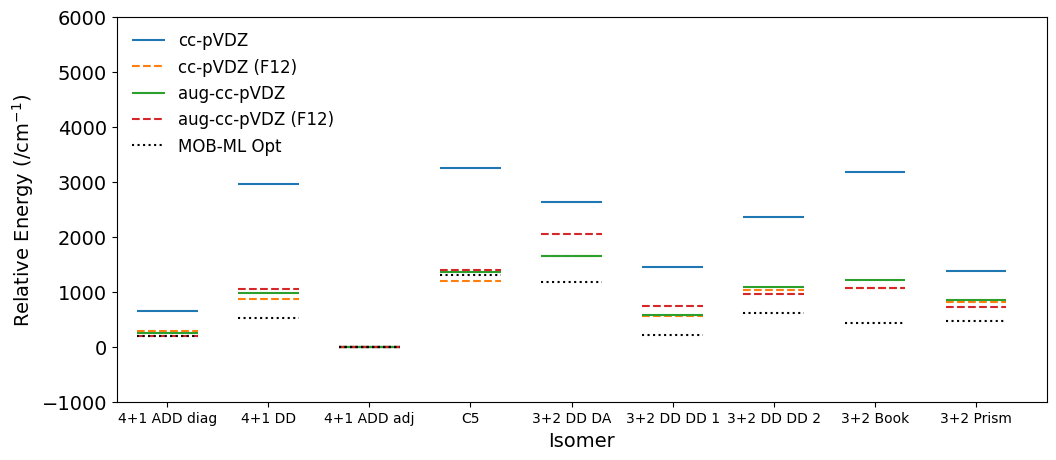

In [105]:
# Plot relative energies of all isomers

plt.rcParams["figure.figsize"] = [12, 5]

# for i, energy in enumerate(rel_mp2_tz):
#     plt.hlines(energy, 5*(i), 5*(i)+3)
# plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='MP2/aug-cc-pVTZ')

# for i, energy in enumerate(rel_mp2_ccsdt_tz):
#     plt.hlines(energy, 5*(i), 5*(i)+3, color = 'tab:pink')
# plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='MP2/aug-cc-pVTZ - CCSD(T)', color = 'tab:pink')

# for i, energy in enumerate(rel_mp2_tz_mobml):
#     plt.hlines(energy, 5*(i), 5*(i)+3, color='tab:green', linestyle='dashed')
# plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='MP2/aug-cc-pVTZ - MOB-ML', color='tab:green', linestyle='dashed')

# for i, energy in enumerate(rel_mp2_qz_mobml):
#     plt.hlines(energy, 5*(i), 5*(i)+3, color='tab:green', linestyle='dashed')
# plt.hlines(0, 0, 3, label='MP2/aug-cc-pVQZ - MOB-ML', color='tab:green', linestyle='dashed')

# plt.hlines(2.56*350, 15, 18, label='Sci. Adv. 2023', color='darkgray', linestyle='dotted', linewidth=2.5)
# plt.hlines(3.10*350, 20, 23, color='darkgray', linestyle='dotted', linewidth=2.5)
# plt.hlines(0, 0, 3, color='darkgray', linestyle='dotted', linewidth=2.5)

# for i, energy in enumerate(rel_egnn_ung_zpe):
#     plt.hlines(energy, 5*(i), 5*(i)+3, color='tab:purple', linestyle='dashed')
# plt.hlines(0, 0, 3, label='EGNN Unguided ZPE', color='tab:purple', linestyle='dashed')

# for i, energy in enumerate(rel_egnn_g_zpe):
#     plt.hlines(energy, 5*(i), 5*(i)+3, color='tab:red')
# plt.hlines(0, 0, 3, label='EGNN Guided ZPE', color='tab:red')

for i, energy in enumerate(rel_cc_pvdz_ccsdt):
    plt.hlines(energy, 5*(i), 5*(i)+3)
plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='cc-pVDZ')

for i, energy in enumerate(rel_cc_pvdz_ccsdt_f12):
    plt.hlines(energy, 5*(i), 5*(i)+3, color = 'tab:orange', linestyle='dashed')
plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='cc-pVDZ (F12)', color = 'tab:orange',linestyle='dashed')

for i, energy in enumerate(rel_aug_cc_pvdz_ccsdt):
    plt.hlines(energy, 5*(i), 5*(i)+3, color = 'tab:green')
plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='aug-cc-pVDZ', color='tab:green')

for i, energy in enumerate(rel_aug_cc_pvdz_ccsdt_f12):
    plt.hlines(energy, 5*(i), 5*(i)+3, color = 'tab:red', linestyle='dashed')
plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='aug-cc-pVDZ (F12)', color = 'tab:red',linestyle='dashed')

for i, energy in enumerate(rel_mobml_opt):
    plt.hlines(energy, 5*(i), 5*(i)+3, color='black', linestyle='dotted')
plt.hlines(0, 5*(rel_ind), 5*(rel_ind)+3, label='MOB-ML Opt', color='black', linestyle='dotted')

plt.legend(fontsize=12, frameon=False, loc='upper left')
plt.xlabel('Isomer')
plt.xlim(-1,45)
plt.xticks(np.arange(1.5,41.5+5, 5), list(df['Isomer'])[:9], fontsize=10)
plt.ylabel(r'Relative Energy (/cm$^{-1}$)')
plt.ylim(-1000,6000)
plt.show()

In [30]:
list(df['Isomer'])

['4+1',
 '4+1 Planar',
 '4+1 Rotated',
 'C5',
 '3+2',
 '3+2 Rotated',
 '3+2 Up/Down',
 '3+2 book',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

### Load in training data generated from MOB-ML DMC simulations

In [ ]:
#Dictionaries for the starting timesteps of the various simulation types for each of the starting isomers
#MOB-ML has holes and has to be restarted every time it fails to converge

train_4_1_dict = {'min_starts': [[0], [0, 34]], 'reg_starts': [[0], [0], [0], [0, 528], [0]], 'wide_starts': [[0, 279, 906, 915], [0, 298, 451, 939]], 'test_starts': [[0, 988]]}
train_c5_dict = {'min_starts': [[0, 45, 374, 698, 812], [0, 944]], 'reg_starts': [[0], [0, 128, 411], [0], [0], [0]], 'wide_starts': [[0, 88, 647], [0, 198, 875]], 'test_starts': [[0, 603, 941]]}
train_3_2_dict = {'min_starts': [[0, 82], [0, 68]], 'reg_starts': [[0, 815], [0], [0, 978], [0, 728, 921], [0]], 'wide_starts': [[0, 249, 313, 877], [0, 683]], 'test_starts': [[0, 473]]}
train_3_2_book_dict = {'min_starts': [[0]], 'reg_starts': [[0]], 'wide_starts': [[0]], 'test_starts': [[0]]}
train_3_2_up_down_dict = {'min_starts': [[0]], 'reg_starts': [[0]], 'wide_starts': [[0]], 'test_starts': [[0]]}
train_4_1_planar_dict = {'min_starts': [[0]], 'reg_starts': [[0]], 'wide_starts': [[0]], 'test_starts': [[0]]}
train_4_1_rotated_dict = {'min_starts': [[0, 658, 961]], 'reg_starts': [[0]], 'wide_starts': [[0]], 'test_starts': [[0]]}

In [139]:
file = f'{ml_path}/h11o6/h11o6_0_training_818ts.hdf5'
f = h5py.File(file, "r")
cds = f['coords']
np.save(f'{ml_path}/h11o6/h11o6_3_2_h2o_rot_scaled_818_start.npy', cds)

In [249]:
#energy_shift = -457.8604991*au_to_cm
energy_shift = -457.862801139232*au_to_cm

isomer = '3_2'
sim_type = 'test'
sim_num = 1

if isomer == '3_2':
    train_dict = train_3_2_dict
elif isomer == '4_1':
    train_dict = train_4_1_dict
elif isomer == 'c5':
    train_dict = train_c5_dict
elif isomer == '3_2_book':
    train_dict = train_3_2_book_dict
elif isomer == '3_2_up_down':
    train_dict = train_3_2_up_down_dict
elif isomer == '4_1_planar':
    train_dict = train_4_1_planar_dict
elif isomer == '4_1_rotated':
    train_dict = train_4_1_rotated_dict
else:
    print("Not a valid isomer name")


train_energies_list = []
train_cds_list = []

if sim_type == 'min':
    sim = '500w_1000ts_1dt'
    starts = train_dict['min_starts'][sim_num - 1]
    end = 1000
elif sim_type == 'wide':
    sim = '1000w_1000ts_10dt'
    starts = train_dict['wide_starts'][sim_num - 1]
    end = 1000
elif sim_type == 'reg':
    if isomer in ['4_1', 'c5', '3_2']:
        if sim_num in [1, 2]:
            sim = '200w_5000ts_10dt'
            end = 1000
    else:
        sim = '200w_1000ts_10dt'
        end = 1000


    starts = train_dict['reg_starts'][sim_num - 1]

elif sim_type == 'test':
    sim = '1000w_1000ts_10dt_min'
    starts = train_dict['test_starts'][sim_num - 1]
    end = 1000

else:
    print("Not a valid sim type")

print(f'starting {isomer} {sim_type} sim number {sim_num}')

for j in range(len(starts)):
    print(f'starting at timestep {starts[j]}')

    path = f'{data_path}/mobml_pyscf/{isomer}_min/sim_{sim_num}/{sim}_{starts[j]}_start'

    training_sim = pv.SimInfo(f'{path}/h11o6_0_sim_info.hdf5')
    
    if j+1 < len(starts):
        for b in range(starts[j+1]-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift) #record energy relative to 4+1 minimum
            
            #print(f'snapshot {b+starts[j]} done')
    else:
        for b in range(end-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift)
            
            #print(f'snapshot {b+starts[j]} done')
     


starting 3_2 test sim number 1
starting at timestep 0
starting at timestep 473


In [32]:
train_4_1_dict = {'min_starts': [[0]], 'wide_starts': [[0]]}
train_4_1_rot_dict = {'min_starts': [[0]], 'wide_starts': [[0,473]]}
train_4_1_planar_dict = {'min_starts': [[0,18,386]], 'wide_starts': [[0]]}
train_c5_dict = {'min_starts': [[0]], 'wide_starts': [[0]]}
train_3_2_dict = {'min_starts': [[0]], 'wide_starts': [[0,218,756]]}
train_3_2_h2o_rot_dict = {'min_starts': [[0, 988]], 'wide_starts': [[0,818]]}
train_3_2_up_down_dict = {'min_starts': [[0]], 'wide_starts': [[0,533]]}
train_3_2_prism_dict = {'min_starts': [[0,458,941]], 'wide_starts': [[0,373,821]]}
train_3_2_book_dict = {'min_starts': [[0]], 'wide_starts': [[0,503]]}

In [52]:
energy_shift = -457.862801139232*au_to_cm

isomer = '3_2_prism'
sim_type = 'min'
sim_num = 1
if isomer == '3_2':
    train_dict = train_3_2_dict
elif isomer == '4_1':
    train_dict = train_4_1_dict
elif isomer == 'c5':
    train_dict = train_c5_dict
elif isomer == '3_2_h2o_rot':
    train_dict = train_3_2_h2o_rot_dict
elif isomer == '3_2_up_down':
    train_dict = train_3_2_up_down_dict
elif isomer == '4_1_planar':
    train_dict = train_4_1_planar_dict
elif isomer == '4_1_rot':
    train_dict = train_4_1_rot_dict
elif isomer == '3_2_book':
    train_dict = train_3_2_book_dict
elif isomer == '3_2_prism':
    train_dict = train_3_2_prism_dict
else:
    print("Not a valid isomer name")


train_energies_list = []
train_cds_list = []

if sim_type == 'min':
    sim = '500w_1000ts_1dt'
    starts = train_dict['min_starts'][sim_num - 1]
    end = 1000
    path_start = f'{data_path}/mobml_pyscf/{isomer}_mobml_opt/sim_{sim_num}'

elif sim_type == 'wide':
    sim = 'scaled_O_x02_1000w_1000ts_10dt'
    starts = train_dict['wide_starts'][sim_num - 1]
    end = 1000
    if isomer in ['3_2_book', '3_2_prism']:
        path_start = f'{data_path}/mobml_pyscf/{isomer}_mobml_opt/sim_{sim_num}'
    else:
        path_start = f'{data_path}/mobml_pyscf/{isomer}_mp2_qz_min/sim_{sim_num}'
else:
    print("Not a valid sim type")

print(f'starting {isomer} {sim_type} sim number {sim_num}')

for j in range(len(starts)):
    print(f'starting at timestep {starts[j]}')

    path = f'{path_start}/{sim}_{starts[j]}_start'

    training_sim = pv.SimInfo(f'{path}/h11o6_0_sim_info.hdf5')
    
    if j+1 < len(starts):
        for b in range(starts[j+1]-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift) #record energy relative to 4+1 minimum
            
            #print(f'snapshot {b+starts[j]} done')
    else:
        for b in range(end-starts[j]):
            cds,energies = training_sim.get_training(f'{path}/h11o6_0_training_{b}ts.hdf5',ret_ang=False, ret_cm=True)
            
            train_cds_list.append(cds)
            train_energies_list.append(energies-energy_shift)
            
            #print(f'snapshot {b+starts[j]} done')

starting 3_2_prism min sim number 1
starting at timestep 0
starting at timestep 458
starting at timestep 941


In [53]:
min_geom = read_xyz_file(f'{ml_path}/h11o6/geometries/h11o6_{isomer}_mobml_opt_new.xyz')
min_energy = h11o6_mobml_opt_energy_dict[isomer]*au_to_cm - energy_shift

min_energy

465.92603838443756

In [54]:
train_energies_list.append(np.array([min_energy]))
train_cds_list.append(min_geom.reshape(1,17,3))

In [55]:
train_energies = np.concatenate(train_energies_list)
train_cds = np.concatenate(train_cds_list)

In [56]:
#check energy range of simulation
print(np.min(train_energies), np.max(train_energies))

465.92603838443756 110733.75241723657


In [ ]:
np.save(f'{ml_path}/h11o6/training_data/h11o6_{isomer}_mobml_{sim_type}_sim_{sim_num}_training_cds.npy',train_cds)
np.save(f'{ml_path}/h11o6/training_data/h11o6_{isomer}_mobml_{sim_type}_sim_{sim_num}_training_energies.npy',train_energies)

### Create full training data sets

In [ ]:
# Load in DMC snapshot data, skipping over timesteps that failed

h11o6_snapshot_cds = np.load(f'{ml_path}/h11o6/training_sets/h11o6_3_2_unguided_100k_75kts_snapshot.npy')
h11o6_dmc_cds = []
h11o6_dmc_energies = []
for i in np.arange(0, len(h11o6_snapshot_cds), 1000):
    try:
        energy = np.load(f'{ml_path}/h11o6/training_sets/h11o6_snapshots/{i}-{i+1000}_3_2_energies.npy')
        h11o6_dmc_energies.append(energy)
        h11o6_dmc_cds.append(h11o6_snapshot_cds[i:i+1000])
    except:
        print(f'Skipping {i}-{i+1000}')
        continue
h11o6_dmc_energies = np.concatenate(h11o6_dmc_energies)*au_to_cm - energy_shift
h11o6_dmc_cds = np.concatenate(h11o6_dmc_cds)

np.save(f'{ml_path}/h11o6/training_data/h11o6_3_2_dmc_energies.npy', h11o6_dmc_energies)
np.save(f'{ml_path}/h11o6/training_data/h11o6_3_2_dmc_cds.npy', h11o6_dmc_cds)

### Compare energy distributions between the different parts of the training data

In [ ]:
def plot_training_data(isomer):

    _, train_min_energies = make_training_set([isomer], ['min'], [[1]])
    _, train_wide_energies = make_training_set([isomer], ['wide'], [[1]])
    _, train_reg_energies = make_training_set([isomer], ['reg'], [[1,2,3,4,5]])
    _, train_test_energies = make_training_set([isomer], ['test'], [[1]])

    dmc_energies = np.load(f'{ml_path}/h11o6/training_data/h11o6_{isomer}_dmc_energies.npy')

    n, bins = np.histogram(train_min_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} min')

    n, bins = np.histogram(train_wide_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} wide')

    n, bins = np.histogram(train_reg_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} reg')

    n, bins = np.histogram(train_test_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} test')

    n, bins = np.histogram(dmc_energies, bins=np.arange(0, 100000, 200), density = True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    plt.plot(bin_centers, n, label = f'{isomer} DMC')

    plt.xlabel(r'MOB-ML Energy (/cm$^{-1}$)')
    plt.ylabel('Density of Points')
    plt.xlim(0, 80000)
    plt.ylim(0, 6e-5)
    plt.legend()
    plt.show()

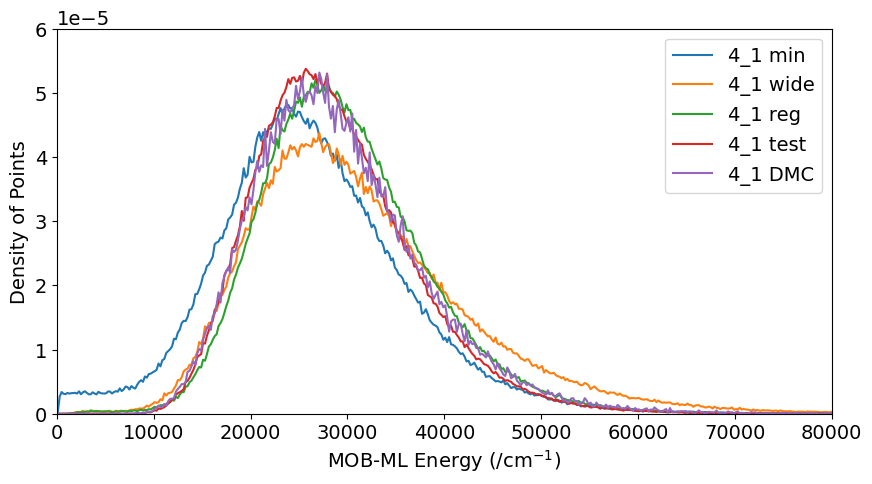

In [219]:
plot_training_data('4_1')

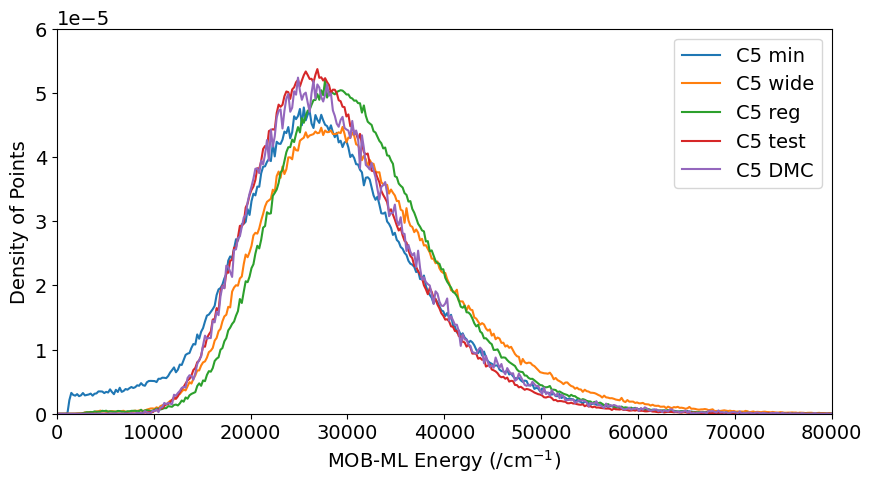

In [220]:
plot_training_data('C5')

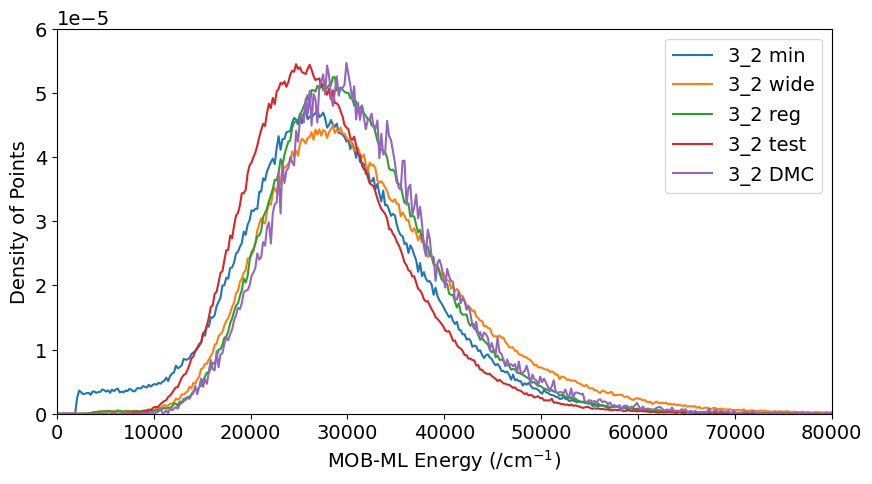

In [221]:
plot_training_data('3_2')

### PCA Analysis of Training Features

In [176]:
def save_pca(data,n_isomers):
    # Load reference structures
    # --------------------------------------------------
    coords = data      # (N_ref, 17, 3)
    oxygen_idx = [0, 3, 6, 9, 12, 15]

    oxygen_coords = coords[:, oxygen_idx, :]  # (N_ref, 6, 3)

    # --------------------------------------------------
    # Build pairwise O–O distance features
    # --------------------------------------------------

    X = np.array([pdist(oxygen_coords[i]) for i in range(len(coords))])

    # --------------------------------------------------
    # Fit scaler, PCA, KMeans
    # --------------------------------------------------
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=n_isomers, n_init=50, random_state=0)
    labels = kmeans.fit_predict(X_pca)

    # --------------------------------------------------
    # Save everything
    # --------------------------------------------------
    joblib.dump(scaler, f"{ml_path}/h11o6/scaler.joblib")
    joblib.dump(pca, f"{ml_path}/h11o6/pca.joblib")
    joblib.dump(kmeans, f"{ml_path}/h11o6/kmeans.joblib")


In [177]:
save_pca(min_cds_sample,9)

In [193]:
def plot_pca(data,x_num,y_num,lim,square):
    # --------------------------------------------------
    # Load trained models
    # --------------------------------------------------
    scaler = joblib.load(f"{ml_path}/h11o6/scaler.joblib")
    pca = joblib.load(f"{ml_path}/h11o6/pca.joblib")
    kmeans = joblib.load(f"{ml_path}/h11o6/kmeans.joblib")

    # --------------------------------------------------
    # Load new structures
    # --------------------------------------------------
    coords_new = data # (N_new, 17, 3)
    oxygen_idx = [0, 3, 6, 9, 12, 15]
    oxygen_coords_new = coords_new[:, oxygen_idx, :]

    # --------------------------------------------------
    # Build features
    # --------------------------------------------------
    X_new = np.array([pdist(oxygen_coords_new[i]) for i in range(len(coords_new))])

    # --------------------------------------------------
    # Apply scaler → PCA → KMeans
    # --------------------------------------------------
    X_new_scaled = scaler.transform(X_new)
    X_new_pca = pca.transform(X_new_scaled)
    labels_new = kmeans.predict(X_new_pca)

    isomers = ['c5','4_1','4_1_rot','4_1_planar','3_2','3_2_h2o_rot','3_2_up_down','3_2_book','3_2_prism']
    isomer_new_names = [r'C$_5$',r'4+1$_{\mathrm{DDA}}^{\mathrm{diag}}$',r'4+1$_{\mathrm{DDA}}^{\mathrm{adj}}$',r'4+1$_\mathrm{DD}$',
                        r'3+2$_\mathrm{DD,DA}$',r'3+2$_\mathrm{DD,DD}^1$',r'3+2$_\mathrm{DD,DD}^2$', '3+2 Book','3+2 Prism']

    mobml_min_geoms = []
    for i in isomers:
        geom = read_xyz_file(f"{ml_path}/h11o6/geometries/h11o6_{i}_mobml_opt_new.xyz")
        mobml_min_geoms.append(geom)

    mobml_min_geoms = np.array(mobml_min_geoms)

    min_oxygen_coords = mobml_min_geoms[:, oxygen_idx, :]
    X_min = np.array([pdist(min_oxygen_coords[i]) for i in range(len(min_oxygen_coords))])

    X_min_scaled = scaler.transform(X_min)
    X_min_pca = pca.transform(X_min_scaled)
    labels_min = kmeans.predict(X_min_pca)

    # np.save(f"{ml_path}/h11o6/X_pca_new.npy", X_new_pca)
    # np.save(f"{ml_path}/h11o6/labels_new.npy", labels_new)

    # print("New data projected into reference PCA/KMeans space.")

    # Define the colors you want for each cluster
    cluster_colors = {
        0: "tab:blue",
        1: "tab:purple",
        2: "tab:pink",
        3: "tab:red",
        4: "tab:orange",
        5: "tab:green",
        6: "tab:brown",
        7: "gray",
        8: "black"
    }

    # Map labels to colors
    colors = [cluster_colors[lbl] if lbl in cluster_colors else "gray" for lbl in labels_new]

    plt.figure(figsize=(7,6))
    plt.scatter(X_new_pca[:,x_num-1], X_new_pca[:,y_num-1], c='lightgray', s=6, alpha=0.2)

    for i, name in enumerate(isomers):
        plt.scatter(X_min_pca[i,x_num-1], X_min_pca[i,y_num-1], s=30, alpha=1, label=f'{isomer_new_names[i]}')

    plt.vlines([-square, square],-square,square,color='black')
    plt.hlines([-square,square],-square,square,color='black')

    plt.xlabel(f"PC{x_num}")
    plt.ylabel(f"PC{y_num}")
    plt.legend(frameon=False,fontsize=11)
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    #plt.title(f"{sim_type} data in fixed PCA space")
    plt.show()

In [147]:
# Load in 
sim_type = 'min'
reg_cds, reg_energies = make_training_set(ml_path, 'h11o6', ['4_1','3_2', '3_2_h2o_rot', '3_2_up_down', '4_1_rot', '4_1_planar', 'c5', '3_2_book', '3_2_prism'], [sim_type], [[1]])

In [148]:
import random

# Generate list of indices
indices = list(range(len(reg_cds)))

# Shuffle the indices randomly
random.shuffle(indices)

split_idx = 100000

# Partition the data
test_indices = indices[:split_idx]

test_cds = reg_cds[test_indices]

In [149]:
min_cds_sample = test_cds

In [34]:
for i, geom in enumerate(centroid_geometries_full):
    save_xyz_file(f'{ml_path}/h11o6/geometries/h11o6_{sim_type}_pca_{n_isomers}_isomer_{i+1}.xyz', h11o6_atom_names, centroid_geometries_full[i]*au_to_ang)

### Project new set of training data onto saved PCA model from above

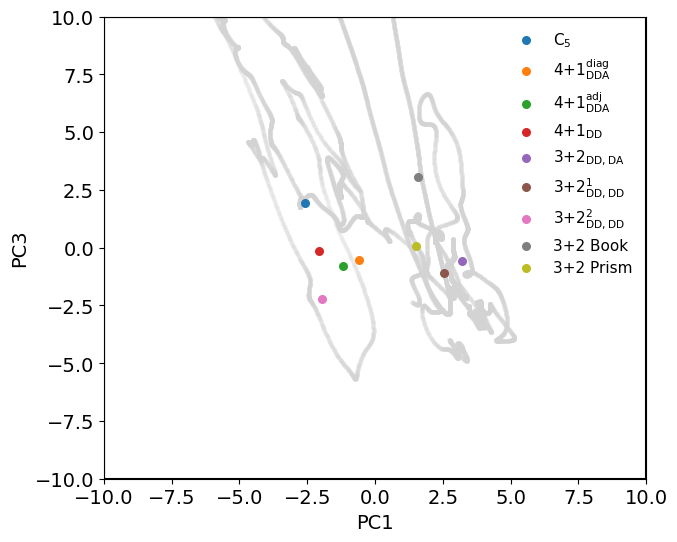

In [224]:
plot_pca(mobml_training,1,3,10,10)

### Save structures with min and max PC1 and PC2 elements

In [111]:
# Project reference structures into PCA space
X_pca = pca.transform(scaler.transform(X))

# Choose extreme structures along PC2
idx_min = np.argmin(X_pca[:, 1])
idx_max = np.argmax(X_pca[:, 1])

geom_min = coords[idx_min]  # full geometry
geom_max = coords[idx_max]

save_xyz_file(f"{ml_path}/h11o6/geometries/pc2_min_geom.xyz", h11o6_atom_names, geom_min*au_to_ang)
save_xyz_file(f"{ml_path}/h11o6/geometries/pc2_max_geom.xyz", h11o6_atom_names, geom_max*au_to_ang)


### Generate NN Model Training Set

In [110]:
# Load in 
sim_type = 'min'
min_cds, min_energies = make_training_set(ml_path,'h11o6',['c5','4_1','3_2_up_down','4_1_rot','3_2','3_2_h2o_rot','4_1_planar','3_2_book','3_2_prism'], [sim_type], [[1]])

In [111]:
import random

# Generate list of indices
indices = list(range(len(min_cds)))

# Shuffle the indices randomly
random.shuffle(indices)

split_idx = 125000

# Partition the data
sample_indices = indices[:split_idx]

min_cds_sample = min_cds[sample_indices]
min_energies_sample = min_energies[sample_indices]

In [112]:
# Load in 
sim_type = 'wide'
wide_cds, wide_energies = make_training_set(ml_path,'h11o6',['c5','4_1','3_2_up_down','4_1_rot','3_2','3_2_h2o_rot','4_1_planar','3_2_book','3_2_prism'], [sim_type], [[1]])

In [113]:
import random

# Generate list of indices
indices = list(range(len(wide_cds)))

# Shuffle the indices randomly
random.shuffle(indices)

split_idx = 375000

# Partition the data
sample_indices = indices[:split_idx]

wide_cds_sample = wide_cds[sample_indices]
wide_energies_sample = wide_energies[sample_indices]

In [114]:
isomers = ['c5','4_1','3_2_up_down','4_1_rot','3_2','3_2_h2o_rot','4_1_planar','3_2_book','3_2_prism']
min_geoms = []
min_energies = []
for isom in isomers:
    min_geom = read_xyz_file(f'{ml_path}/h11o6/geometries/h11o6_{isom}_mobml_opt_new.xyz')
    min_energy = h11o6_mobml_opt_energy_dict[isom]*au_to_cm - energy_shift
    min_geoms.append(min_geom)
    min_energies.append(min_energy)
min_geoms = np.array(min_geoms)
min_energies = np.array(min_energies)


In [115]:
training_cds = np.concatenate([min_cds_sample, wide_cds_sample, min_geoms])
training_energies = np.concatenate([min_energies_sample, wide_energies_sample, min_energies])

In [116]:
np.save(f'{ml_path}/h11o6/training_data/h11o6_nine_isoms_125k_min_375k_wide_cds.npy',training_cds)
np.save(f'{ml_path}/h11o6/training_data/h11o6_nine_isoms_125k_min_375k_wide_energies.npy',training_energies)

In [297]:
old_energies = np.load(f"{ml_path}/h11o6/training_data_old/h11o6_3_2_dmc_energies.npy")

In [298]:
new_energies = old_energies + 505.2392118126154

In [299]:
np.save(f"{ml_path}/h11o6/training_data_old/h11o6_3_2_dmc_energies_reshifted.npy", new_energies)

In [67]:
isomer = '3_2_prism'
timestep = 49500
energy_array = np.load(f'{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_nine_isomers_unguided_{timestep}ts_mobml_energies/final_energies.npy')
energy_array.shape

(99858,)

In [57]:
mobml_dws = np.load(f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_nine_isomers_unguided_{timestep}ts_cds.npy")
dws_sliced = np.concatenate([mobml_dws[:8000],mobml_dws[9000:13000],mobml_dws[14000:]])
np.save(f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_nine_isomers_unguided_{timestep}ts_cds.npy",dws_sliced)

In [58]:
cds_sliced.shape

NameError: name 'cds_sliced' is not defined

In [68]:
isomer = '3_2_prism'
mobml_energies = np.load(f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_nine_isomers_unguided_49500ts_mobml_energies/final_energies.npy")
energies_shifted = (mobml_energies - -457.862801139232)*au_to_cm
np.save(f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_nine_isomers_unguided_49500ts_mobml_energies/final_energies_shifted.npy",energies_shifted)

### NN Model Error Analysis

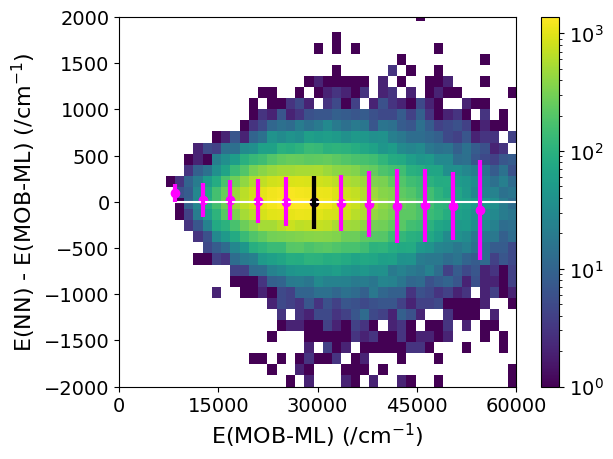

MAE: 220.17, average error: -7.36


In [82]:
isomer = '3_2'
timestep = 2500
plot_egnn_2d_pred_errors('h11o6',
                         f"{ml_path}/h11o6/models/egnn/h11o6_egnn_nine_500k_64_3_3_ln_best.pth",
                    f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_all_isomers_unguided_{timestep}ts_cds.npy",
                    f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_all_isomers_unguided_{timestep}ts_mobml_energies/final_energies_shifted.npy",
                    #f"{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_all_isomers_unguided_{timestep}ts_dws.npy"
                    )

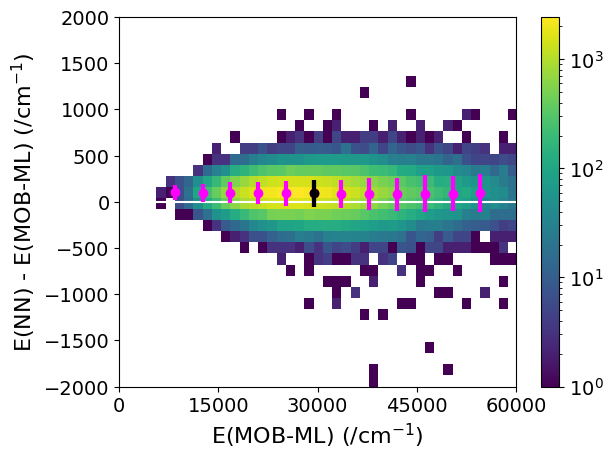

MAE: 135.34, average error: 89.74


In [ ]:
plot_egnn_2d_pred_errors(f"{ml_path}/h11o6/models/egnn/h11o6_egnn_4_1_64_3_3_ln_best.pth",
                    f"{ml_path}/h11o6/training_data/h11o6_4_1_egnn_all_isomers_unguided_49500ts_cds.npy",
                    f"{ml_path}/h11o6/training_data/h11o6_4_1_egnn_all_isomers_unguided_49500ts_mobml_energies/final_energies_shifted.npy")

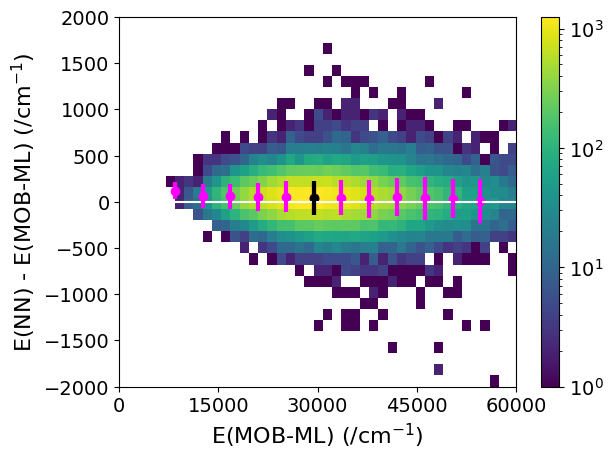

MAE: 142.41, average error: 45.43


In [302]:
plot_egnn_2d_pred_errors(f"{ml_path}/h11o6/models/egnn/h11o6_egnn_all_64_3_3_ln_best.pth",
                    f"{ml_path}/h11o6/training_data_old/h11o6_3_2_dmc_cds.npy",
                    f"{ml_path}/h11o6/training_data_old/h11o6_3_2_dmc_energies_reshifted.npy")

## DMC Simulation Analysis

### Energy Analysis

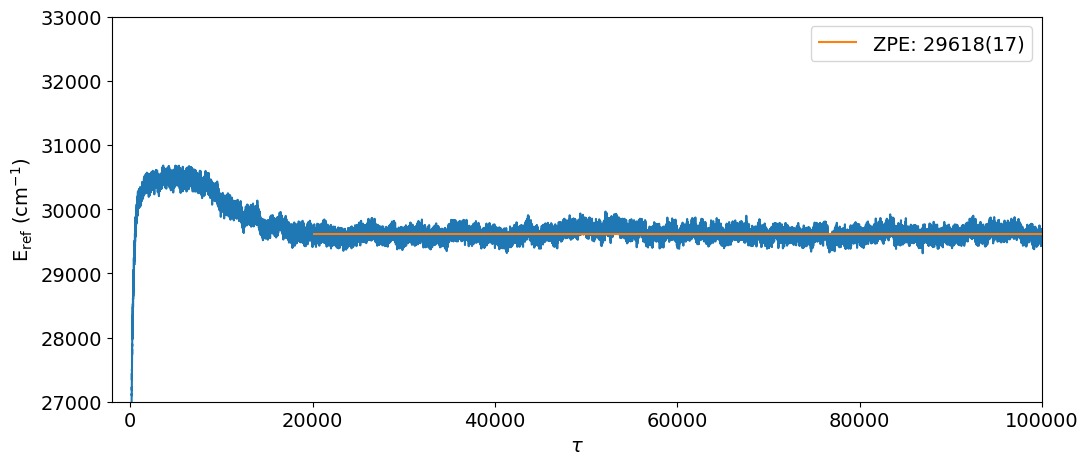

29618 0


In [208]:
ZPEs = []

isomer = "c5"
model_type = "EGNN"
model_training = "all" #'nine' or 'all'
guided = True

if model_type == "EGNN":
    if model_training is not None:
        if guided:
            model = f"{model_training}_isomers/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/h2o_guided"
        else:
            model = f"{model_training}_isomers/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/unguided"
    else:
        if guided:
            model = "64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided"
        else:
            model = "64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/unguided"
elif model_type == "NN":
    if isomer in ["3_2_up_down", "3_2_book", "3_2"]:
        if guided:
            model = "450_3hidden_6_decay_molec_atom_sort_standardized/model_5_reg_no_B/dist_65_energy_1/h2o_guided"
        else:
            model = "450_3hidden_6_decay_molec_atom_sort_standardized/model_5_reg_no_B/dist_65_energy_1/unguided"
    else:
        if guided:
            model = "450_3hidden_6_decay_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided"
        else:
            model = "450_3hidden_6_decay_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/unguided"


walkers = 100000
timesteps = 100000

start_time = 20000
end_time = 100000
step = (end_time - start_time) // 5

tau = np.linspace(0,timesteps,timesteps)
for i in range(1):
    #tutorial_sim = pv.SimInfo('C:/Users/gjaco/OneDrive/Documents/UW/McCoy Group/H11O6-/Data/NN_Data/3_2_start/450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1/h2o_guided/1.0w_100000_walkers_50000t_1dt/H11O6_{2}_sim_info.hdf5'.format(walkers,timesteps,i))
    tutorial_sim = pv.SimInfo(f'{data_path}/{model_type}_Data/{isomer}_start/{model}/1.0w_{walkers}_walkers_{timesteps}t_1dt/H11O6_{i}_sim_info.hdf5')

    vref = tutorial_sim.get_vref(ret_cm=True)

    means = []
    for j in range(start_time,end_time,step):
        mean = np.mean(vref[j:j+step,1])
        means.append(mean)

    std = np.std(means)
    
    plt.plot(tau,vref[:timesteps,1],
             #label=f'ZPE: {ZPE:.0f}({std:.0f})'
             )
    

    ZPE = np.mean(vref[start_time:end_time,1])
    ZPEs.append(ZPE)

    plt.hlines(ZPE,start_time,end_time,color='tab:orange',label=f'ZPE: {ZPE:.0f}({std:.0f})')
    #plt.hlines(29123, 0,100000,color='black',linestyle='dashed',label='4+1 ZPE: 29 123')

    plt.ylabel(r'E$_\mathrm{ref}$ (cm$^{-1}$)')
    plt.xlabel(r'$\tau$')
    plt.xlim(-2000,100000)
    plt.ylim(27000,33000)
    plt.legend()
    plt.show()

print(round(np.mean(ZPEs)), round(np.std(ZPEs)))


In [326]:
manual_ZPEs = [29154, 29134, 29161]
print(round(np.mean(manual_ZPEs)), round(np.std(manual_ZPEs)))

29150 11


### Save representative geometry from a given simulation timestep

In [110]:
sim_num = 0
snapshot = 50000
max_cds = get_max_wt_wfn(f'{data_path}/{model_type}_Data/{isomer}_start/{model}/1.0w_{walkers}_walkers_{timesteps}t_1dt/wfns/H11O6_{sim_num}_wfn_{snapshot}ts.hdf5')
save_xyz_file(f'{ml_path}/h11o6/geometries/h11o6_{isomer}_h2o_guided_{sim_num}_max_{snapshot}ts.xyz',h11o6_atom_names,max_cds*au_to_ang)

In [18]:
sim_num = 0
snapshot = 49500
filename = f'{data_path}/{model_type}_Data/{isomer}_start/{model}/1.0w_{walkers}_walkers_{timesteps}t_1dt/wfns/H11O6_{sim_num}_wfn_{snapshot}ts.hdf5'
f = h5py.File(filename, "r")
cds = f['coords']
weights = f['desc_wts']

In [19]:
np.save(f'{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_{model_training}_isomers_unguided_{snapshot}ts_dws.npy',weights)
np.save(f'{ml_path}/h11o6/training_data/h11o6_{isomer}_egnn_{model_training}_isomers_unguided_{snapshot}ts_cds.npy',cds)

In [6]:
filename = f'{ml_path}/h11o6/h11o6_0_training_483ts.hdf5'
f = h5py.File(filename, "r")
cds = f['coords']

In [7]:
483 + 458

941

In [8]:
np.save(f'{ml_path}/h11o6/h11o6_3_2_prism_min_941_start.npy',cds)

In [334]:

energy_list = []
for start in range(0, 9952, 1000):
    end = min(start+1000, 9952)
    print(start, end)


0 1000
1000 2000
2000 3000
3000 4000
4000 5000
5000 6000
6000 7000
7000 8000
8000 9000
9000 9952


### Wavefunction analysis

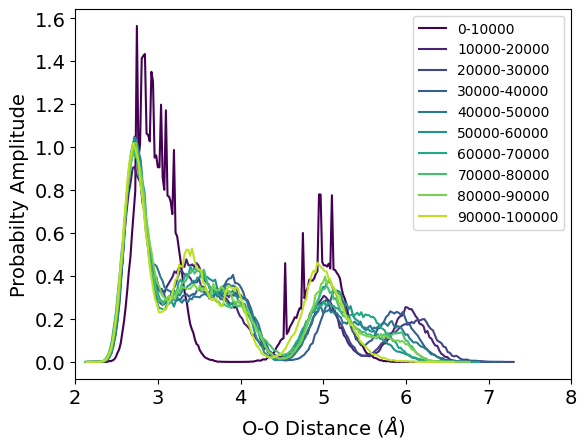

In [13]:
from itertools import combinations

isomer = "c5"
model_type = "NN"

if model_type == "EGNN":
    model = "64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu"
elif model_type == "NN":
    model = "450_3hidden_6_decay_0_dropout_2mill_revised_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1"

sim_num = 0
walkers = 100000
timesteps = 100000

starts = np.arange(0,100000,10000)

cmap = plt.cm.viridis

# Generate a list of colors from the colormap
colors = [cmap(i / len(starts)) for i in range(len(starts))]

for i in range(len(starts)):

    snapshots = np.arange(starts[i],starts[i]+5000,500)

    tutorial_sim = pv.SimInfo(f'{data_path}/{model_type}_Data/{isomer}_start/{model}/h2o_guided/1.0w_{walkers}_walkers_{timesteps}t_1dt/H11O6_{sim_num}_sim_info.hdf5')
    coords, weights = tutorial_sim.get_wfns(snapshots)
    coords = pv.Constants.convert(coords,'angstroms',to_AU=False) # Conversion of cds to angstroms

    analyzer = pv.AnalyzeWfn(coords)

    oxygens = [0, 3, 6, 9, 12, 15]
    OOs = list(combinations(oxygens, 2))

    oo_cumulative = []
    total_dws = []
    for pair in OOs:
        bond_length = analyzer.bond_length(pair[0],pair[1])
        oo_cumulative.append(bond_length)
        total_dws.append(weights)

    oo_total = np.concatenate(oo_cumulative)
    total_dws = np.concatenate(total_dws)

    n, bins = np.histogram(oo_total,weights=total_dws,bins=200,density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    plt.plot(bin_centers,n,color=colors[i],label=f'{starts[i]}-{starts[i]+10000}')

plt.legend(fontsize=10)
plt.xlim(2,8)
plt.xlabel(r'O-O Distance ($\AA$)')
#plt.ylim(0,1)
plt.ylabel('Probabilty Amplitude')
plt.show()

In [17]:
isomer = "c5"
model_type = "EGNN"
all_isoms = True
guided = True
sim_num = 0

if model_type == "EGNN":
    if all_isoms:
        if guided:
            model = "all_isomers/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/h2o_guided"
        else:
            model = "all_isomers/64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/unguided"
    else:
        if guided:
            model = "64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/h2o_guided"
        else:
            model = "64_3layers_3freqs_6decay_1gradclip_2mill_std_energies/gpu/unguided"
elif model_type == "NN":
    if isomer in ["3_2_up_down", "3_2_book", "3_2"]:
        model = "450_3hidden_6_decay_molec_atom_sort_standardized/model_5_reg_no_B/dist_65_energy_1"
    else:
        model = "450_3hidden_6_decay_molec_atom_sort_standardized/model_5_reg/dist_65_energy_1"

walkers = 100000
timesteps = 100000

file = f'{data_path}/{model_type}_Data/{isomer}_start/{model}/1.0w_{walkers}_walkers_{timesteps}t_1dt/wfns/H11O6_{sim_num}_wfn_34000ts.hdf5'
f = h5py.File(file, "r")
dmc_cds = f['coords']
#np.save(f'{ml_path}/h11o6/h11o6_3_2_h2o_rot_scaled_818_start.npy', cds)

### Analyze MOB-ML Training Set

In [209]:
reorder_idx = [0,1,2,12,14,13,6,7,8,9,10,4,15,11,16,3,5]

In [119]:
mobml_training = []
for i in range(10500):
    geom = read_xyz_file(f"{ml_path}/h11o6/mobml_training/geo/{i}.xyz")
    mobml_training.append(geom)
mobml_training = np.array(mobml_training)

In [210]:
mobml_training = mobml_training[:,reorder_idx]

In [211]:
save_xyz_file(f'{ml_path}/h11o6/geometries/mobml_geo_0_test.xyz',h11o6_atom_names,mobml_training[0]*au_to_ang)